In [42]:
#necessary libraries
!pip install torchcam
import torch
import torchcam
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive

import torchvision
print(torchvision.__version__)

0.20.0+cu121


In [43]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

In [44]:
from google.colab import files
uploaded = files.upload()

Saving border-collie.jpg to border-collie.jpg


Uploaded file: border-collie.jpg


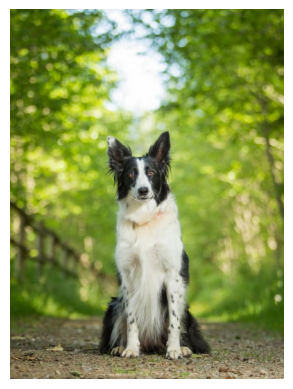

In [48]:
filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)


from PIL import Image
import matplotlib.pyplot as plt

# Open the image using PIL
img = Image.open(filename)

# Display the image with matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [51]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

model = resnet18(pretrained=True).eval()
# Get your input
img = img
# Preprocess it for your chosen model
input_tensor = normalize(resize(to_tensor(img), (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


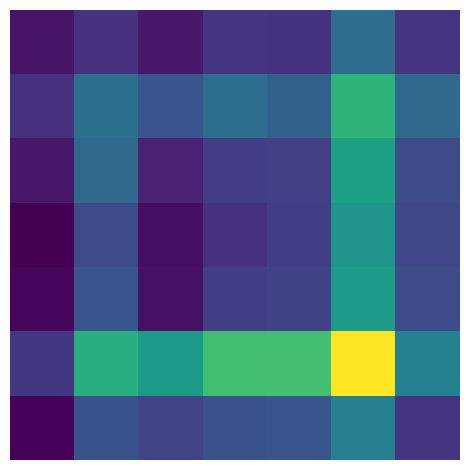

In [53]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

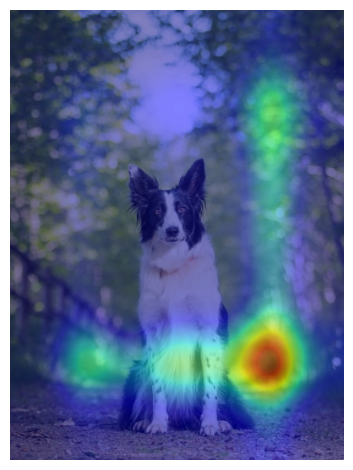

In [57]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(to_tensor((img))), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [52]:
#necessary libraries
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive

import torchvision
print(torchvision.__version__)

0.20.0+cu121


In [ ]:
#Loading a pretrained model
try:
    model = models.inception_resnet_v2(pretrained=True)
except AttributeError:
    # If inception_resnet_v2 is not available, use a different model
    # or install the required version of torchvision
    print("inception_resnet_v2 is not available in your current torchvision version.")
    print("Please upgrade torchvision or use a different model.")
    model = deeplabv3_resnet50(pretrained=True)  # Example: Use ResNet-18 instead
model.eval()

inception_resnet_v2 is not available in your current torchvision version.
Please upgrade torchvision or use a different model.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#Load Image

# Mount Google Drive
drive.mount('/content/drive')

# Load the image from a path inside your drive
img = Image.open('/content/drive/My Drive/images_dnn/photo1.jpg')
img = Image.open('soybean.jpg')

#Preprocess Image
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/images_dnn/photo1.jpg'

In [ ]:
#Add noise to image
import numpy as np

def add_noise(img_tensor, mean=0, std=0.1):
    noise = torch.randn(img_tensor.size()) * std + mean
    noisy_img_tensor = img_tensor + noise
    return torch.clip(noisy_img_tensor, 0, 1)  # Keep values within [0, 1]

noisy_img_tensor = add_noise(img_tensor)

#Visualize noisy image
noisy_img = noisy_img_tensor.squeeze().permute(1, 2, 0)  # Reformat for plotting
plt.imshow(noisy_img.numpy())
plt.show()


In [ ]:
#Extract Features
feature_extractor = torch.nn.Sequential(*list(model.children())[:-2])  # Remove classification layers
features = feature_extractor(img_tensor)

#Visualize Feature Map
feature_map = features.squeeze().detach().numpy()
plt.imshow(feature_map[0], cmap='viridis')  # Plot the first feature map
plt.show()


In [ ]:
#Visualize feature Importance using TorchCam
pip install torchcam

from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask

cam_extractor = GradCAM(model)
activation_map = cam_extractor(img_tensor, target_class=282)  # Replace 282 with appropriate class

result = overlay_mask(img, activation_map.squeeze().cpu().numpy(), alpha=0.5)
plt.imshow(result)
plt.show()
